In [27]:
import gym
env = gym.make('BipedalWalker-v3')
env.observation_space.shape[0]#.sample()
env.action_space.shape[0]

4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def convert_log(file_dir, horizon = 0.9):
    with open(file_dir, 'r') as f:
        data = f.readlines()
    moving_avgs, rewards, episodes, frames = [], [], [], []
    for i, d in enumerate(data):
        if d[0] == 't':
            episodes.append(float(d.split('episodes ')[1].split(', frame')[0]))
            rewards.append(float(d.split('mean epr ')[1].split(', ru')[0]))
            frames.append(float(d.split('frames ')[1].split('M, mean')[0]))
            if i == 0:
                moving_avgs.append(float(d.split('mean epr ')[1].split(', ru')[0]))
            else:
                moving_avgs.append(moving_avgs[-1]*horizon + rewards[-1]*(1-horizon))
    
    rewards_ = np.zeros(500)
    rewards_count = np.zeros(500)
    frames_ = []
    for f,r in zip(frames, rewards):
        rewards_[int(f//0.01)] += r
        rewards_count[int(f//0.01)] += 1.
        if float(f//0.01)*0.01 not in frames_: frames_.append(float(f//0.01)*0.01)
    
    moving_avgs_ = []
    for i in range(500):
        rewards_[i] /= rewards_count[i]
        if i == 0:
            moving_avgs_.append(rewards_[0])
        else:
            moving_avgs_.append(moving_avgs_[-1]*horizon + rewards_[i]*(1-horizon))
    return episodes, rewards, moving_avgs, frames, rewards_, frames_, moving_avgs_

/tmp/ipykernel_3234804/797193209.py:25: RuntimeWarning: invalid value encountered in scalar divide
  rewards_[i] /= rewards_count[i]


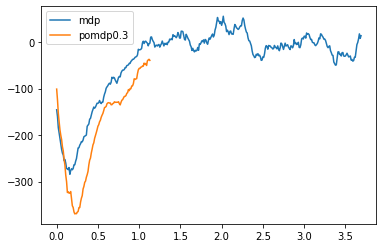

In [31]:
episodes, rewards, moving_avgs, frames, rewards_, frames_, moving_avgs_ = convert_log('/home/hhy/Reservoir-Computing/lunarlander/log/07-07-00-13/log.txt', horizon=0.95)
plt.plot(frames_[0:370], moving_avgs_[0:370])
episodes, rewards, moving_avgs, frames, rewards_, frames_, moving_avgs_ = convert_log('/home/hhy/Reservoir-Computing/lunarlander/log/07-07-17-28/log.txt', horizon=0.95)
plt.plot(frames_[0:114], moving_avgs_[0:114])
plt.legend(['mdp', 'pomdp0.3'])


In [92]:
# 0.85-0.97 0.035
file_dir = [
    # '/home/hhy/Reservoir-Computing/lunarlander/log/07-04-15-49/log.txt',
    # '/home/hhy/Reservoir-Computing/lunarlander/log/07-04-15-52/log.txt',
    '/home/hhy/Reservoir-Computing/lunarlander/log/07-05-01-02/log.txt',
    '/home/hhy/Reservoir-Computing/lunarlander/log/07-05-01-03/log.txt',
    '/home/hhy/Reservoir-Computing/lunarlander/log/07-05-01-04/log.txt',
]

# 0.97-0.97 0
file_dir1 = [
    '/home/hhy/Reservoir-Computing/lunarlander/log/07-05-17-41/log.txt',
    '/home/hhy/Reservoir-Computing/lunarlander/log/07-05-17-43/log.txt',
    '/home/hhy/Reservoir-Computing/lunarlander/log/07-05-17-44/log.txt'
]

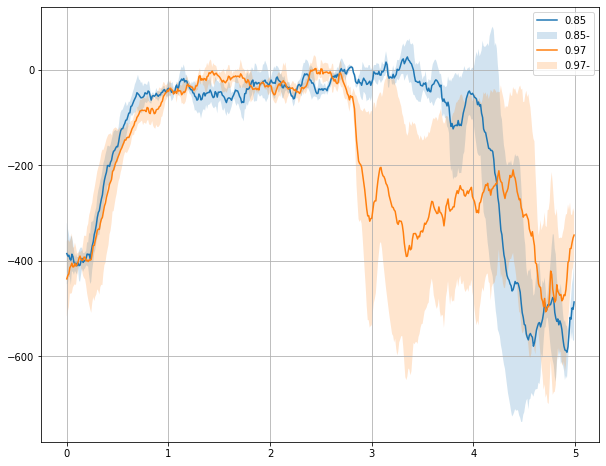

In [104]:
mean = np.zeros((3, 500))
plt.figure(figsize=(10, 8))
for i, dir in enumerate(file_dir):
    episodes, rewards, moving_avgs, frames, rewards_, frames_, moving_avgs_ = convert_log(dir, horizon=0.9)
    mean[i,:] = moving_avgs_
plt.plot(frames_, mean.mean(0), label='0.85')
plt.fill_between(frames_, mean.mean(0)-np.std(mean, 0), mean.mean(0)+np.std(mean, 0), alpha=0.2, label='0.85-')

mean = np.zeros((3, 500))
for i, dir in enumerate(file_dir1):
    episodes, rewards, moving_avgs, frames, rewards_, frames_, moving_avgs_ = convert_log(dir, horizon=0.9)
    # print(len(frames_), len(rewards_), len(moving_avgs_))
    mean[i,:] = moving_avgs_

plt.plot(frames_, mean.mean(0), label='0.97')

plt.fill_between(frames_, mean.mean(0)-np.std(mean, 0), mean.mean(0)+np.std(mean, 0), alpha=0.2, label='0.97-')
plt.legend()
plt.grid()

In [84]:
np.std(mean, 0).shape

(500,)

In [ ]:
with open('/home/hhy/Reservoir-Computing/log/lunarlander-v2/07-04-01-13/log.txt', 'r') as f:
    data = f.readlines()
moving_avg = []
rewards = []
episodes = []
for i, d in enumerate(data):
    if d[0] == 't':
        episodes.append(float(d.split('episodes ')[1].split(', frame')[0]))
        rewards.append(float(d.split('mean epr ')[1].split(', ru')[0]))
        if i == 0:
            moving_avg.append(float(d.split('mean epr ')[1].split(', ru')[0]))
        else:
            moving_avg.append(moving_avg[-1]*horizon + rewards[-1]*(1-horizon))

# plt.plot(episodes, rewards)
plt.plot(episodes, moving_avg)

plt.legend(['0.85','0.96'])
plt.grid()
plt.savefig('lunarlander-v2-snn_lr-1e-3_mask_0.85渐进-0.96对比.pdf')